<a href="https://colab.research.google.com/github/wdavjr/wd-mta-major-incidents-analysis/blob/main/mta_major_incidents_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
incidents = pd.read_csv('https://raw.githubusercontent.com/wdavjr/wd-mta-major-incidents-analysis/refs/heads/main/MTA_Subway_Major_Incidents__Beginning_2020.csv')

In [9]:
incidents.head()

,month,division,line,day_type,category,count
0,2020-01-01,A DIVISION,1,1,Other,1
1,2020-01-01,A DIVISION,2,1,Persons on Trackbed/Police/Medical,1
2,2020-01-01,A DIVISION,2,2,Other,1
3,2020-01-01,A DIVISION,3,1,Persons on Trackbed/Police/Medical,1
4,2020-01-01,A DIVISION,3,1,Signals,2


## Incident Trend Analysis Over Time

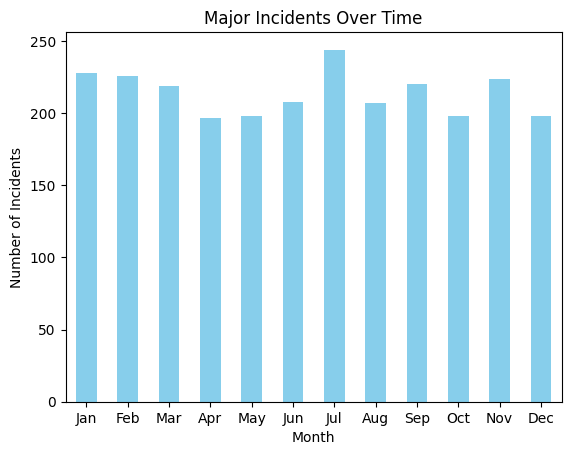

In [18]:
# Define a mapping of month numbers to 3-letter month abbreviations
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Convert 'month' to datetime, extract month, map to month names, and group by month
incidents['month_name'] = pd.to_datetime(incidents['month']).dt.month.map(month_map)

# Group by month_name and sum 'count', then plot
incidents.groupby('month_name')['count'].sum().reindex(month_map.values()).plot(kind='bar',
    title='Major Incidents Over Time', color='skyblue', xlabel='Month', ylabel='Number of Incidents')

plt.xticks(rotation=0)
plt.show()
